In [228]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [229]:
def dictsort(dict):
    
    dict2={}
    key_list=list(dict.keys())
    value_list= list(dict.values())


    for i in (key_list[:len(key_list)-1]):
        for j in (key_list[1:len(key_list)]):
            if j<i:
                temp=j
                key_list[key_list.index(j)]=i
                key_list[key_list.index(i)]=temp
            else:
                continue

    for key, value in zip(key_list, value_list):
        dict2[key]= dict[key]

    return dict2

In [230]:
def hist(image):
    
    hist=freq(image)
    
    pixel_intensity=[]
    frequency=[]
    
    for key, value in hist.items():
        pixel_intensity.append(key)
        frequency.append(value)
        
    plt.bar(pixel_intensity,frequency)
    plt.show()
    return hist

In [231]:
def padd(d, bits):
    
    for i in range(0,2**bits):
            if i in list(d.keys()):
                continue
            else:
                d[i]=0
    d= dictsort(d)
    return d

In [232]:
def histdict(dict1):

    fk= list(dict1.keys())
    nk= list(dict1.values())
    ck= []
    s=0
    
    for elements in nk:
        s=s+elements
        ck.append(s)
    
    return ck

In [233]:
def histmatch(img1,img2):
    
    dict1= freq(img1)
    dict2= freq(img2)
    
    dict1= padd(dict1,8)
    dict2= padd(dict2,8)
    
    eq1= histdict(dict1)
    eq2= histdict(dict2)
    
    mapping={}
    count=0
    
    for val1 in eq1:
        for key, val2 in enumerate(eq2):
            if val1<=val2:
                mapping[count]=key
                count+=1
                break
    
    new_img = img1.copy()
    
    for i in range (new_img.shape[0]):
        for j in range (new_img.shape[1]):
            new_img[i][j]=mapping[new_img[i][j]]
    
    return new_img 

In [234]:
def histdmatch(dict1,dict2):
    
    eq1= histdict(dict1)
    eq2= histdict(dict2)
    
    
    mapping={}
    count=0
    
    for val1 in eq1:
        for key, val2 in enumerate(eq2):
            if val1<=val2:
                mapping[count]=key
                count+=1
                break
    print(mapping)

In [235]:
l1=np.array([[0,2,1,3,4],[1,3,4,3,3],[0,1,3,1,4],[3,1,4,2,0],[0,4,2,4,4]])
l2=np.array([[2,1,2,1,0],[3,3,2,4,4],[1,3,2,4,4],[0,0,3,2,1],[1,3,1,4,0]])

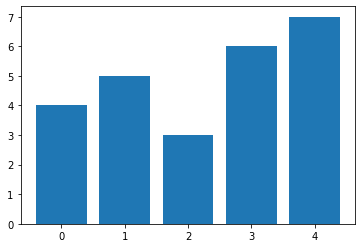

In [236]:
hist1=hist(l1)

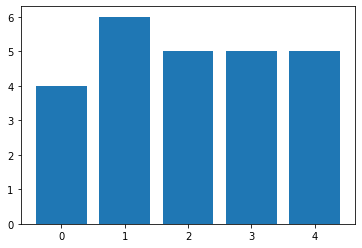

In [237]:
hist1=hist(l2)

In [238]:
matched_img=histmatch(l1,l2)

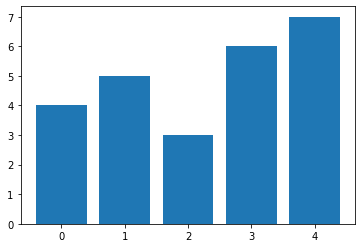

In [239]:
matched_hist= hist(matched_img)

In [246]:
img= cv2.imread('0791.png')
img2= cv2.imread('0798.png')

In [247]:
inputImage=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
refImage=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [248]:
matched_img=histmatch(inputImage,refImage)

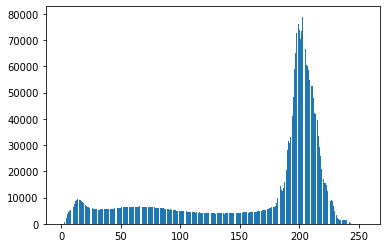

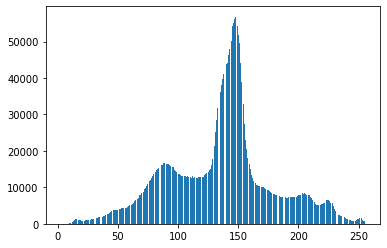

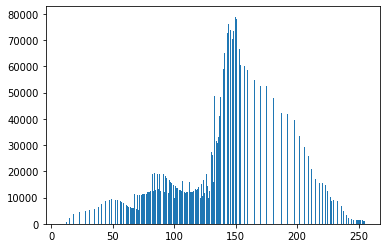

In [251]:
h1=hist(inputImage)
h2=hist(refImage)
h3=hist(matched_img)

Text(0.5, 1.0, 'Input image after Histogram matching')

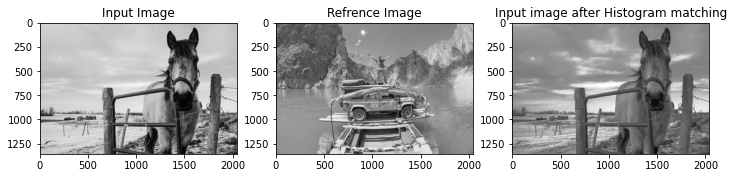

In [250]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('Input Image')
plt.imshow(inputImage, cmap='gray')
plt.subplot(132)
plt.imshow(refImage, cmap='gray')
plt.title('Refrence Image')
plt.subplot(133)
plt.imshow(matched_img, cmap='gray')
plt.title('Input image after Histogram matching')